# Résolution problème Osborne 2

In [1]:
using BenchmarkTools, ForwardDiff, Distributions

In [2]:
include("../src/enlsip_functions_castor2.jl")

enlsip

In [3]:
n = 11
m = 65 
nb_eq = 0
nb_constraints = 22

22

In [4]:
# DataPoints

dataset = [1 0.0 1.366 ;
2 0.1 1.191 ;
3 0.2 1.112 ;
4 0.3 1.013 ;
5 0.4 0.991 ;
6 0.5 0.885 ;
7 0.6 0.831 ;
8 0.7 0.847 ;
9 0.8 0.786 ;
10 0.9 0.725 ;
11 1.0 0.746 ;
12 1.1 0.679 ;
13 1.2 0.608 ;
14 1.3 0.655 ;
15 1.4 0.616 ;
16 1.5 0.606 ;
17 1.6 0.602 ;
18 1.7 0.626 ;
19 1.8 0.651 ;
20 1.9 0.724 ;
21 2.0 0.649 ;
22 2.1 0.649 ;
23 2.2 0.694 ;
24 2.3 0.644 ;
25 2.4 0.624 ;
26 2.5 0.661 ;
27 2.6 0.612 ;
28 2.7 0.558 ;
29 2.8 0.533 ;
30 2.9 0.495 ;
31 3.0 0.500 ;
32 3.1 0.423 ;
33 3.2 0.395 ;
34 3.3 0.375;
35 3.4 0.538 ;
36 3.5 0.522 ;
37 3.6 0.506 ;
38 3.7 0.490 ;
39 3.8 0.478 ;
40 3.9 0.467 ;
41 4.0 0.457 ;
42 4.1 0.457 ;
43 4.2 0.457 ;
44 4.3 0.457 ;
45 4.4 0.457 ;
46 4.5 0.457 ;
47 4.6 0.457 ;
48 4.7 0.457 ;
49 4.8 0.457 ;
50 4.9 0.457 ;
51 5.0 0.457;
52 5.1 0.431 ;
53 5.2 0.431 ;
54 5.3 0.424 ;
55 5.4 0.420 ;
56 5.5 0.414 ;
57 5.6 0.411 ;
58 5.7 0.406 ;
59 5.8 0.406 ;
60 5.9 0.406 ;
61 6.0 0.406 ;
62 6.1 0.406 ;
63 6.2 0.406 ;
64 6.3 0.406 ;
65 6.4 0.406]

t = dataset[1:m,2]
y = dataset[1:m,3]

65-element Vector{Float64}:
 1.366
 1.191
 1.112
 1.013
 0.991
 0.885
 0.831
 0.847
 0.786
 0.725
 0.746
 0.679
 0.608
 ⋮
 0.424
 0.42
 0.414
 0.411
 0.406
 0.406
 0.406
 0.406
 0.406
 0.406
 0.406
 0.406

In [5]:
function r_k(x::Vector, t::Float64, y::Float64)
    rx = x[1]*exp(-x[5]*t) + x[2]*exp(-x[6]*(t-x[9])^2) + x[3]*exp(-x[7]*(t-x[10])^2) + x[4]*exp(-x[8]*(t-x[11])^2)
    return y - rx
end

function r(x::Vector)
    return [r_k(x,t[k],y[k]) for k=1:m]
end

resOsborne2 = ResidualsEval(0)

function (resOsborne2::ResidualsEval)(x::Vector, rx::Vector, J::Matrix)

    # Evaluate the residuals
    if abs(resOsborne2.ctrl) == 1
        rx[:] = r(x)

    # The jacobian is computed analytically
    elseif resOsborne2.ctrl == 2
        J[:] = ForwardDiff.jacobian(r,x)
    end
    return
end

In [6]:
function c(x::Vector)
    res = [x[1] - 1.31; 1.4 - x[1];
            x[2] - 0.4314 ; 0.8 - x[2];
            x[3] - 0.6336; 1.0 - x[3];
            x[4] - 0.5; 1.0 - x[4];
            x[5] - 0.5; 1.0 - x[5];
            x[6] - 0.6; 3.0 - x[6];
            x[7] - 1.0; 5.0 - x[7];
            x[8] - 4.0; 7.0 - x[8];
            x[9] - 2.0; 2.5 - x[9];
            x[10] - 4.5689; 5.0 - x[10];
            x[11] - 5.0; 6.0 - x[11]]
    return res
end
    
consOsborne2 = ConstraintsEval(0)

function (consOsborne2::ConstraintsEval)(x::Vector, cx::Vector, A::Matrix)

    # Evaluate the constraints
    if abs(consOsborne2.ctrl) == 1
        cx[:] = c(x)
    # The jacobian is computed numerically if ctrl is set to 0 on return
    elseif consOsborne2.ctrl == 2
        A[:] = ForwardDiff.jacobian(c,x)
    end
    return
end

In [7]:
function generate_starting_point()
    x0 = [rand(Uniform(1.31,1.4));
        rand(Uniform(0.4314 , 0.8));
        rand(Uniform(0.6336, 1.0));
        rand(Uniform(0.5, 1.0));
        rand(Uniform(0.5, 1.0));
        rand(Uniform(0.6, 3.0));
        rand(Uniform(1.0, 5.0));
        rand(Uniform(4.0, 7.0));
        rand(Uniform(2.0, 2.5));
        rand(Uniform(4.5689, 5.0));
        rand(Uniform(5.0, 6.0))]
    return x0
end

generate_starting_point (generic function with 1 method)

In [8]:
x_saved =  [1.3344098963722457
 0.5572842161127423
 0.6757364753061974
 0.8291980513226953
 0.9233565833014519
 0.9588470511477797
 1.9610314699563896
 4.055321823656234
 2.048625993866472
 4.60296578920499
 5.95212572157736]

11-element Vector{Float64}:
 1.3344098963722457
 0.5572842161127423
 0.6757364753061974
 0.8291980513226953
 0.9233565833014519
 0.9588470511477797
 1.9610314699563896
 4.055321823656234
 2.048625993866472
 4.60296578920499
 5.95212572157736

In [9]:
x0 = generate_starting_point()
e = eps(Float64)
se = sqrt(e)
enlsipOsborne2 = enlsip(x0,resOsborne2,consOsborne2,n,m,nb_eq,nb_constraints)


****************************************
*                                      *
*          ENLSIP-JULIA-0.4.0          *
*                                      *
****************************************

Starting point : [1.3120656035174885, 0.6485673824643551, 0.6691478478503271, 0.6512305427444338, 0.9444243879824002, 2.9555447852035117, 1.0878210327234306, 4.498984013460466, 2.448449038948755, 4.9625408824474135, 5.908349466062946]

Starting point :
    1.312066e+00   6.485674e-01   6.691478e-01   6.512305e-01   9.444244e-01   2.955545e+00   1.087821e+00   4.498984e+00   2.448449e+00   4.962541e+00  
    5.908349e+00 

Number of equality constraints   : 0
Number of inequality constraints : 22
Constraints internal scaling     : false


Iteration steps information

iter     objective    cx_sum   reduction     ||p||   dimA  dimJ2     α     conv. speed   max weight   working set
   0  3.620000e+00  0.00e+00   3.01e-01   3.000e+00   0    11   4.33e-02    0.00e+00     1.00e-01     -
  

ENLSIP(300, [1.3588154094907932, 0.524659706365338, 0.6336, 0.5, 0.9810994875230677, 0.6732597381398675, 1.4261610942184482, 4.0, 2.3403233167528867, 4.5689, 6.0], 0.4558772063999209)

## Visualisation

In [10]:
str_to_array = (str::String, T::DataType=Float64) -> parse.(T, split(chop(str; head=1, tail=1), ','))

df = DataFrame(CSV.File("iterates.csv", delim=";"))

,iter,α,x
,Int64,Float64,String
1,1,0.0433499,"[1.3120656035174885, 0.6485673824643551, 0.6691478478503271, 0.6512305427444338, 0.9444243879824002, 2.9555447852035117, 1.0878210327234306, 4.498984013460466, 2.448449038948755, 4.9625408824474135, 5.908349466062946]"
2,2,0.0032226,"[1.31, 0.636172914315302, 0.6587642385380503, 0.6077079267473827, 0.9275466849250318, 2.882752276934, 1.0056178275259302, 4.5460779666733435, 2.4473995790768694, 4.9755236829167435, 5.91374549594468]"
3,3,0.0675841,"[1.31, 0.6353134436930947, 0.6580469475649627, 0.6045827469653977, 0.9265247208007905, 2.877550262222875, 1.0, 4.550553747401099, 2.4472850177170087, 4.976534560270428, 5.914092124945802]"
4,4,0.267409,"[1.31, 0.6165164763768967, 0.6336, 0.5972702175677614, 0.9045630879701847, 2.7306193230978035, 1.0, 4.177812996403438, 2.447303997404148, 4.941783981911, 5.91506162222239]"
5,5,0.299829,"[1.31, 0.5473143406972444, 0.6336, 0.5, 0.8334237098509993, 2.0996595550143318, 1.0, 4.313266103745937, 2.4496529588324907, 4.915294745445495, 5.960410345676929]"
6,6,0.19071,"[1.31, 0.49870040162880275, 0.6336, 0.5, 0.8062741256953813, 1.4783781866192913, 1.103893743085654, 4.396423119758244, 2.4529211213541715, 4.8364157750798045, 6.0]"
7,7,0.411451,"[1.3271202589533302, 0.49262044405251404, 0.6336, 0.5, 0.8368886190662913, 1.1372680821656034, 1.2007343526253336, 4.0, 2.4524445898932727, 4.788570214025343, 6.0]"
8,8,1.0,"[1.3585689132655931, 0.49841036184569804, 0.6336, 0.5, 0.9277854503687634, 0.6, 1.3859453828064754, 4.0, 2.4475451598437874, 4.73784622369188, 6.0]"
9,9,1.0,"[1.3558734494671594, 0.5263366079103127, 0.6336, 0.5, 0.9673139867489239, 0.6326921497130824, 1.6312491569984535, 4.0, 2.400129106007068, 4.635864190789929, 6.0]"


Plots.AnimatedGif("C:\\Users\\pierre\\ProjetENLSIP\\ENLSIP-Julia\\tests\\tmp.gif")
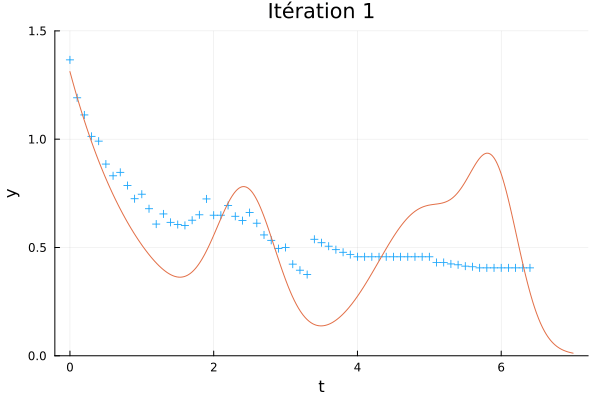

┌ Info: Saved animation to 
│   fn = C:\Users\pierre\ProjetENLSIP\ENLSIP-Julia\tests\tmp.gif
└ @ Plots C:\Users\pierre\.julia\packages\Plots\4UTBj\src\animation.jl:154


In [12]:
f = (x::Vector,t::Number) -> x[1]*exp(-x[5]*t) + x[2]*exp(-x[6]*(t-x[9])^2) + x[3]*exp(-x[7]*(t-x[10])^2) + x[4]*exp(-x[8]*(t-x[11])^2)

entry = range(0,7.0,1000)
anim = @animate for i ∈ df[!,:iter]
    scatter(t,y,markershape=:cross, xlabel="t", ylabel="y", legend=:none,ylims=(0,1.5))
    x = str_to_array(df[i,:x])
    plot!(entry, (t -> f(x,t)).(entry),title="Itération $i")
end
gif(anim, fps = 3)

In [13]:
# Calcul du point le plus éloigné de la droite entre le point de départ et la solution


x_0 = str_to_array(first(df[!,:x]))
x_N = str_to_array(last(df[!,:x]))
xNmx0 = x_N - x_0
nrm_xNmx0 = norm(xNmx0)

dist = 0
x_loin = x_0
x_loin_proj = x_0

for str_x ∈ df[!,:x]
    x = str_to_array(str_x)
    x_proj = (dot(x-x_0,xNmx0) / dot(xNmx0,xNmx0)) * xNmx0
    dist_proj = norm(x-x_0-x_proj)
    if dist_proj > dist
        dist = dist_proj
        x_loin = x
        x_loin_proj = x_proj
    end
end



maximum(z) = 2.036932269779623e94


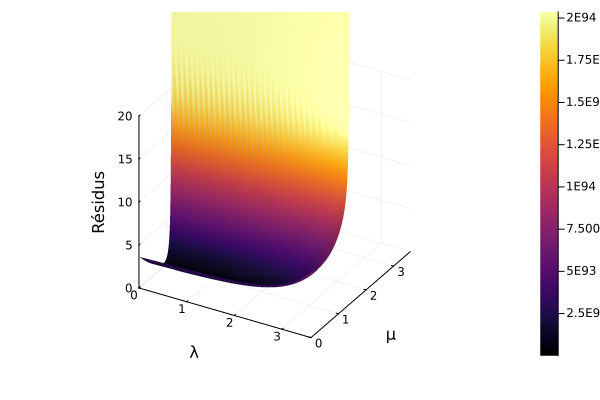

In [14]:
#À revoir
# Square sum of residuals

function ssr(x::Vector)
    rx = r(x)
    return dot(rx,rx)
end

# Rays of the cone {λd + μd̄ | (λ,μ) ∈ [0,ρ]²}

d = x_loin - (3x_0-x_N)/2
d̄ = d - 2*x_loin_proj
ρ = norm(xNmx0*3/2) # 2*nrm_xNmx0 norm(xNmx0*3/2)

scal_d = range(0,ρ,500)
scal_d̄ = range(0,ρ,500)

C =  [x_0 + λ*d + μ*d̄ for λ ∈ scal_d, μ ∈ scal_d̄]

z = (ssr).(C)
@show maximum(z)
surface(scal_d,scal_d̄, z, xlabel="λ", ylabel="μ", zlabel="Résidus", xlims=(0,ρ), ylims=(0,ρ), zlims=(0,20))
# scatter3d!([ρ/2],[ρ/2],[enlsipOsborne2.obj_value])

# Résolution avec Ipopt

In [31]:
using JuMP, Ipopt

In [32]:
x_low = [1.31,0.4314,0.6336,0.5,0.5,0.6,1.0,4.0,2.0,4.5689,5.0]
x_upp = [1.4,0.8,1.0,1.0,1.0,3.0,5.0,7.0,2.5,5.0,6.0]


x_saved =  [1.3344098963722457
 0.5572842161127423
 0.6757364753061974
 0.8291980513226953
 0.9233565833014519
 0.9588470511477797
 1.9610314699563896
 4.055321823656234
 2.048625993866472
 4.60296578920499
 5.95212572157736]

model = Model(Ipopt.Optimizer)
@variable(model,x_low[i] <= x[i=1:n] <= x_upp[i], start = x_saved[i])



@NLobjective(model, Min, sum((y[i] - (x[1]*exp(-x[5]*t[i]) + x[2]*exp(-x[6]*(t[i]-x[9])^2) + x[3]*exp(-x[7]*(t[i]-x[10])^2) + 
            x[4]*exp(-x[8]*(t[i]-x[11])^2)))^2 for i=1:m))

JuMP.optimize!(model)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       66

Total number of variables............................:       11
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       11
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.9525163e+00 0.00e+00 4.44e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  